# <center> CCT College Dublin </center>

## <center> Assessment Cover Page</center>


<br><br><br>
---

<span style="font-size:larger;">

**Module Title:**&nbsp;&nbsp;&nbsp;Data Preparation
	
**Assessment Title:**&nbsp;&nbsp;&nbsp;Machine Learning (10 ETCS)
	
**Lecturer Name:**&nbsp;&nbsp;&nbsp;Dr. Muhammad Iqbal
	
**Student Full Name:**&nbsp;&nbsp;&nbsp;Yumiko Maria Bejarano Azogue 
	
**Student Number:**&nbsp;&nbsp;&nbsp;2024144
	
**Assessment Due Date:**&nbsp;&nbsp;&nbsp;21st April 2024
	
**Date of Submission:**&nbsp;&nbsp;&nbsp;21st April 2024
    
</span> 

<br><br><br>

---

#### Declaration 

```
By submitting this assessment, I confirm that I have read the CCT policy on Academic Misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. I declare it to be my own work and that all material from third parties has been appropriately referenced. I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.
```
<br><br><br>


In [1]:
#  Importing libraries
# !pip install -U scikit-learn

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from datetime import datetime

from wordcloud import WordCloud

In [3]:
# Import thi slibrary to suppress the warnings
import warnings
warnings.filterwarnings('ignore')   # The object 'warnings' is used to call the method 'filterwarnings' and ignore the warnings

sns.set(style="darkgrid")

In [4]:
# import the filee
data = pd.read_csv('collegePlace.csv')

In [5]:
# Display first 5 records
data.head()

Age  Gender                         Stream  Internships  CGPA  Hostel  \
0   22    Male  Electronics And Communication            1     8       1   
1   21  Female               Computer Science            0     7       1   
2   22  Female         Information Technology            1     6       0   
3   21    Male         Information Technology            0     8       0   
4   22    Male                     Mechanical            0     8       1   

   HistoryOfBacklogs  PlacedOrNot  
0                  1            1  
1                  1            1  
2                  0            1  
3                  1            1  
4                  0            1

In [6]:
# Meta information of Dataframe

In [7]:
print(f"Shape of Dataframe is: {data.shape}")

Shape of Dataframe is: (2966, 8)


In [8]:
print('Datatype in Each Column\n')
pd.DataFrame(data.dtypes, columns=['Datatype']).rename_axis("Column Name")

Datatype in Each Column



Datatype
Column Name               
Age                  int64
Gender              object
Stream              object
Internships          int64
CGPA                 int64
Hostel               int64
HistoryOfBacklogs    int64
PlacedOrNot          int64

In [9]:
#  Statistical information of Dataframe

In [10]:
data.describe().T.style.bar(subset=['mean'], color='#205ff2').background_gradient(subset=['std'], cmap='Reds').background_gradient(subset=['50%'], cmap='coolwarm')

In [11]:
#  Checking for NaN values

In [12]:
pd.DataFrame(data.isnull().sum(), columns=["Null Values"]).rename_axis("Column Name")

Null Values
Column Name                   
Age                          0
Gender                       0
Stream                       0
Internships                  0
CGPA                         0
Hostel                       0
HistoryOfBacklogs            0
PlacedOrNot                  0

In [13]:
# EDA & Visualization

In [14]:
## Mean Age of Student

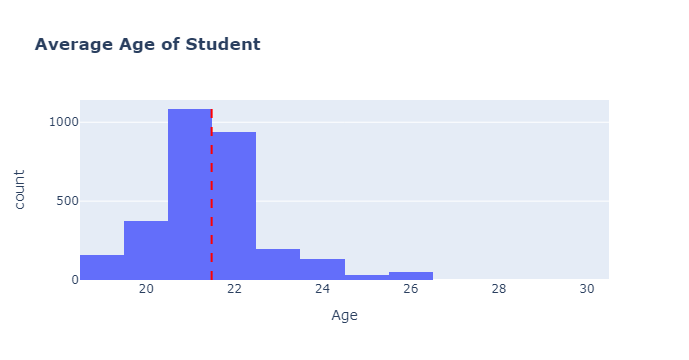

In [15]:
fig = px.histogram(data, 'Age',
                   title="<b>Average Age of Student</b>")

fig.add_vline(x=data['Age'].mean(), line_width=2, line_dash="dash", line_color="red")

fig.show()

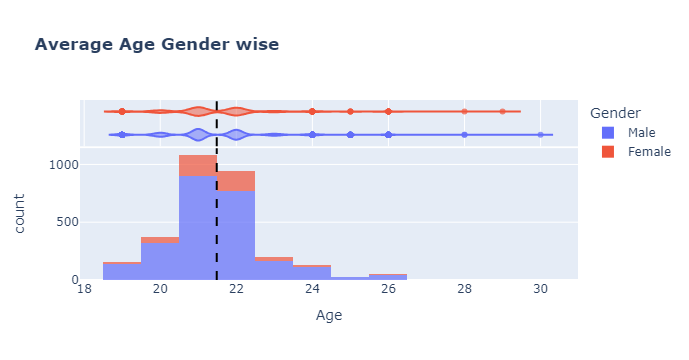

In [16]:
fig = px.histogram(data, 'Age',             
                   color = "Gender",
                   marginal = 'violin',
                   title = "<b>Average Age Gender wise</b>")

fig.update_traces(marker = {"opacity": 0.7})

fig.add_vline(x = data['Age'].mean(),
              line_width = 2,
              line_dash = "dash",
              line_color = "black")

fig.show()

In [17]:
# Total Male & Female

In [18]:
pd.DataFrame(data['Gender'].value_counts()).rename({"Gender":"Counts"}, axis = 1).rename_axis("Gender")

count
Gender       
Male     2475
Female    491

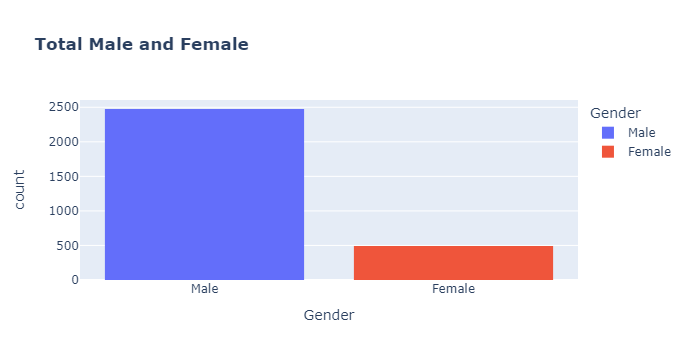

In [19]:
px.histogram(data, x = "Gender", title = "<b>Total Male and Female</b>", color = "Gender")

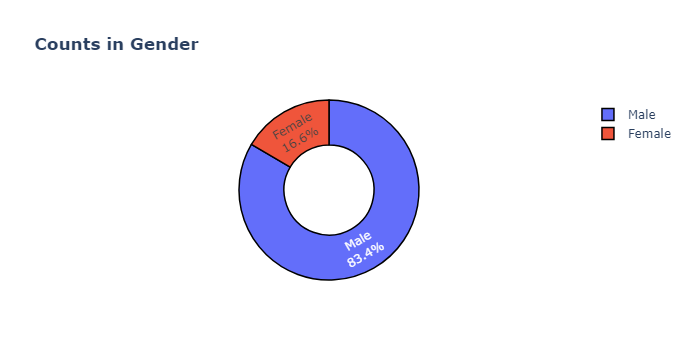

In [20]:
fig = px.pie(data, names = "Gender",
             title = "<b>Counts in Gender</b>",
             hole = 0.5)

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.5)))


fig.show()

In [21]:
# Total Male and Female Pass Placement

In [22]:
male = data[data['Gender'] == "Male"]
female = data[data['Gender'] == "Female"]

In [23]:
total_male = male.shape[0]
total_female = female.shape[0]

In [24]:
total_male_pass = male[male['PlacedOrNot'] == 1].shape[0]
total_female_pass = female[female['PlacedOrNot'] == 1].shape[0]


In [25]:
pass_male_percentage = np.round((total_male_pass * 100) / total_male,2)
pass_female_percentage = np.round((total_female_pass * 100) / total_female,2)

In [26]:
details = {"Total Male": [total_male],
             "Total Female": [total_female],
             "Total male pass" : [total_male_pass],
             "Total female pass" : [total_female_pass],
             "% of Passed Male" : [pass_male_percentage],
             "% of Passed Female" : [pass_female_percentage]}

In [27]:
details

{'Total Male': [2475],
 'Total Female': [491],
 'Total male pass': [1364],
 'Total female pass': [275],
 '% of Passed Male': [55.11],
 '% of Passed Female': [56.01]}

In [28]:
gender_wise = pd.DataFrame(details, index=["Detail"])
gender_wise.T

Detail
Total Male          2475.00
Total Female         491.00
Total male pass     1364.00
Total female pass    275.00
% of Passed Male      55.11
% of Passed Female    56.01

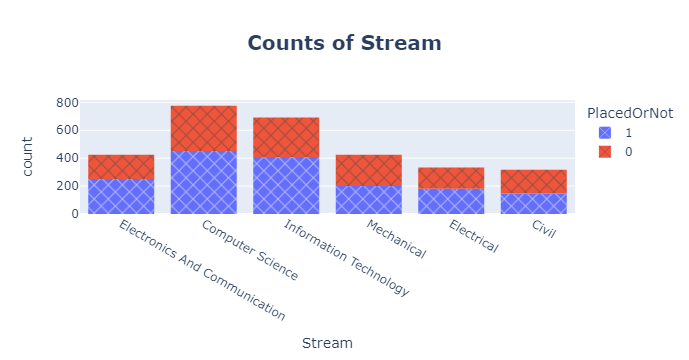

In [29]:
fig = px.histogram(data_frame = data,
             x = "Stream",
             color="PlacedOrNot", title="<b>Counts of Stream</b>",
             pattern_shape_sequence=['x'])

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)


fig.show()

Majority of candidate are Computer Science Student and they are also large in number who got placement as compare to other Streams

In [30]:
# Higher CGPA Vs Placement

In [31]:
## Displaying all those records whose CGPA is above average

In [32]:
cgpa_above_avg = data[data['CGPA'] > data['CGPA'].mean()]

cgpa_above_avg

Age  Gender                         Stream  Internships  CGPA  Hostel  \
0      22    Male  Electronics And Communication            1     8       1   
3      21    Male         Information Technology            0     8       0   
4      22    Male                     Mechanical            0     8       1   
11     22  Female                     Electrical            1     8       0   
13     21    Male               Computer Science            1     8       0   
...   ...     ...                            ...          ...   ...     ...   
2951   21    Male               Computer Science            3     8       0   
2952   23    Male                     Mechanical            0     8       1   
2954   23  Female               Computer Science            1     8       0   
2956   22    Male               Computer Science            0     8       0   
2965   23    Male                          Civil            0     8       0   

      HistoryOfBacklogs  PlacedOrNot  
0                     1            1  
3                     1            1  
4                     0            1  
11                    1            1  
13                    1            1  
...                 ...          ...  
2951                  0            1  
2952                  0            1  
2954                  1            1  
2956                  0            1  
2965                  0            1  

[1080 rows x 8 columns]

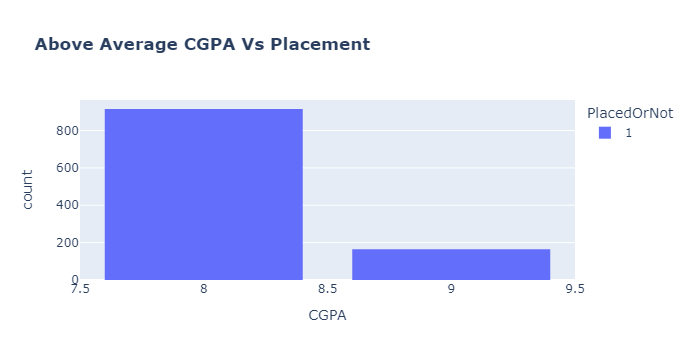

In [33]:
fig = px.histogram(data_frame = cgpa_above_avg,
                   x = 'CGPA',
                   color='PlacedOrNot',
                   title = "<b>Above Average CGPA Vs Placement</b>",
                   template='plotly')

fig.update_layout(bargap=0.2)

fig.show()

Above graph represents that all those students whose CGPA is above average has successfully pass placement test, So we can say that if a person has higher CGPA it will increase his/her chance of placement.

In [34]:
# Lower CGPA Vs Placement

In [35]:
## Candidates whose CGPA is below average

In [36]:
cgpa_below_avg = data[data['CGPA'] < data['CGPA'].mean()]

cgpa_below_avg

Age  Gender                         Stream  Internships  CGPA  Hostel  \
1      21  Female               Computer Science            0     7       1   
2      22  Female         Information Technology            1     6       0   
5      22    Male  Electronics And Communication            0     6       0   
6      21    Male               Computer Science            0     7       0   
7      21    Male         Information Technology            1     7       0   
...   ...     ...                            ...          ...   ...     ...   
2960   23    Male                     Mechanical            1     7       1   
2961   23    Male         Information Technology            0     7       0   
2962   23    Male                     Mechanical            1     7       1   
2963   22    Male         Information Technology            1     7       0   
2964   22    Male               Computer Science            1     7       0   

      HistoryOfBacklogs  PlacedOrNot  
1                     1            1  
2                     0            1  
5                     0            0  
6                     1            0  
7                     0            0  
...                 ...          ...  
2960                  0            0  
2961                  0            0  
2962                  0            0  
2963                  0            0  
2964                  0            0  

[1886 rows x 8 columns]

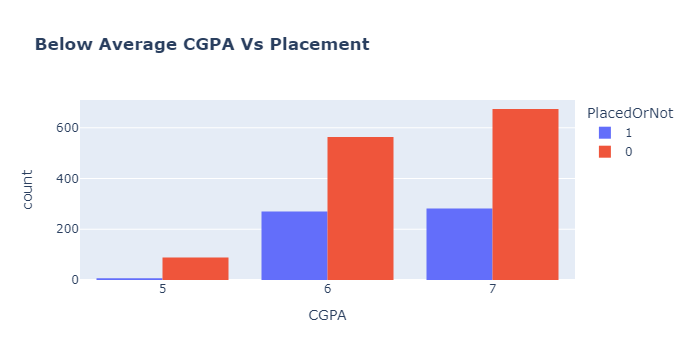

In [37]:
fig = px.histogram(data_frame = cgpa_below_avg,
                   x = 'CGPA',
                   color='PlacedOrNot',
                   title = "<b>Below Average CGPA Vs Placement</b>",
                   barmode='group')

fig.update_layout(bargap=0.2)

fig.show()

From above above, if some student has CGPA below average it will reduce his/her chances of placement

In [38]:
#  Analyze important features stream wise

In [39]:
stream_wise = data.groupby('Stream').agg({'Age':'mean',
                                          'Internships' : 'sum',                            
                                           "CGPA":'mean',
                                           'PlacedOrNot':'sum'})

stream_wise.style.highlight_max()

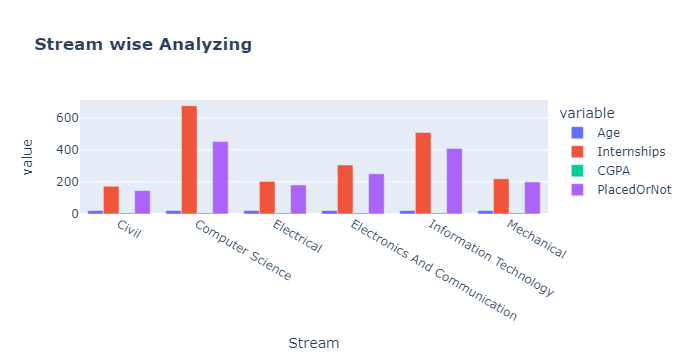

In [40]:
px.bar(data_frame=stream_wise, barmode='group',
       title = "<b>Stream wise Analyzing</b>")

In [41]:
# Effect of No Internship Experience on Placement

In [42]:
no_internship = data[data['Internships'] == 0]

no_internship

Age  Gender                         Stream  Internships  CGPA  Hostel  \
1      21  Female               Computer Science            0     7       1   
3      21    Male         Information Technology            0     8       0   
4      22    Male                     Mechanical            0     8       1   
5      22    Male  Electronics And Communication            0     6       0   
6      21    Male               Computer Science            0     7       0   
...   ...     ...                            ...          ...   ...     ...   
2956   22    Male               Computer Science            0     8       0   
2958   23    Male               Computer Science            0     6       0   
2959   23    Male         Information Technology            0     7       0   
2961   23    Male         Information Technology            0     7       0   
2965   23    Male                          Civil            0     8       0   

      HistoryOfBacklogs  PlacedOrNot  
1                     1            1  
3                     1            1  
4                     0            1  
5                     0            0  
6                     1            0  
...                 ...          ...  
2956                  0            1  
2958                  1            0  
2959                  0            0  
2961                  0            0  
2965                  0            1  

[1331 rows x 8 columns]

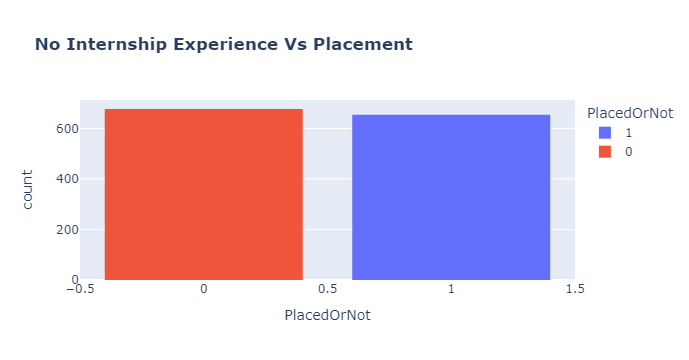

In [43]:
fig = px.histogram(data_frame = no_internship,
                   x = "PlacedOrNot",
                   color="PlacedOrNot",
                   title = "<b>No Internship Experience Vs Placement</b>")

fig.update_layout(bargap = 0.2)

fig.show()

So from above graph, if person don't have any Internship Experience, it will not much effect on his/her placement. Majority of the student who don't have any Internship Experience has passed the placement exam

In [44]:
#  Preprocessing data for Machine Learning

In [45]:
## One-Hot Encoding

In [46]:
dummy_gender = pd.get_dummies(data['Gender'])
dummy_stream = pd.get_dummies(data['Stream'])

In [47]:
data = pd.concat([data.drop(["Gender", "Stream"], axis = 1), dummy_gender, dummy_stream], axis = 1)

data

Age  Internships  CGPA  Hostel  HistoryOfBacklogs  PlacedOrNot  Female  \
0      22            1     8       1                  1            1   False   
1      21            0     7       1                  1            1    True   
2      22            1     6       0                  0            1    True   
3      21            0     8       0                  1            1   False   
4      22            0     8       1                  0            1   False   
...   ...          ...   ...     ...                ...          ...     ...   
2961   23            0     7       0                  0            0   False   
2962   23            1     7       1                  0            0   False   
2963   22            1     7       0                  0            0   False   
2964   22            1     7       0                  0            0   False   
2965   23            0     8       0                  0            1   False   

       Male  Civil  Computer Science  Electrical  \
0      True  False             False       False   
1     False  False              True       False   
2     False  False             False       False   
3      True  False             False       False   
4      True  False             False       False   
...     ...    ...               ...         ...   
2961   True  False             False       False   
2962   True  False             False       False   
2963   True  False             False       False   
2964   True  False              True       False   
2965   True   True             False       False   

      Electronics And Communication  Information Technology  Mechanical  
0                              True                   False       False  
1                             False                   False       False  
2                             False                    True       False  
3                             False                    True       False  
4                             False                   False        True  
...                             ...                     ...         ...  
2961                          False                    True       False  
2962                          False                   False        True  
2963                          False                    True       False  
2964                          False                   False       False  
2965                          False                   False       False  

[2966 rows x 14 columns]

In [48]:
## Rearrange columns

In [49]:
data = data[['Age', 'Male', 'Female',
             'Electronics And Communication',
             'Computer Science', 'Information Technology',
             'Mechanical', 'Electrical', "Civil",
             "Internships","CGPA",'Hostel',
             'HistoryOfBacklogs', 'PlacedOrNot']]

data

Age   Male  Female  Electronics And Communication  Computer Science  \
0      22   True   False                           True             False   
1      21  False    True                          False              True   
2      22  False    True                          False             False   
3      21   True   False                          False             False   
4      22   True   False                          False             False   
...   ...    ...     ...                            ...               ...   
2961   23   True   False                          False             False   
2962   23   True   False                          False             False   
2963   22   True   False                          False             False   
2964   22   True   False                          False              True   
2965   23   True   False                          False             False   

      Information Technology  Mechanical  Electrical  Civil  Internships  \
0                      False       False       False  False            1   
1                      False       False       False  False            0   
2                       True       False       False  False            1   
3                       True       False       False  False            0   
4                      False        True       False  False            0   
...                      ...         ...         ...    ...          ...   
2961                    True       False       False  False            0   
2962                   False        True       False  False            1   
2963                    True       False       False  False            1   
2964                   False       False       False  False            1   
2965                   False       False       False   True            0   

      CGPA  Hostel  HistoryOfBacklogs  PlacedOrNot  
0        8       1                  1            1  
1        7       1                  1            1  
2        6       0                  0            1  
3        8       0                  1            1  
4        8       1                  0            1  
...    ...     ...                ...          ...  
2961     7       0                  0            0  
2962     7       1                  0            0  
2963     7       0                  0            0  
2964     7       0                  0            0  
2965     8       0                  0            1  

[2966 rows x 14 columns]

In [ ]:
# Scaling features

In [50]:
scaler = StandardScaler()

scaler.fit(data.drop('PlacedOrNot',axis=1))

scaled_features = scaler.transform(data.drop('PlacedOrNot',axis=1))

In [51]:
scaled_features = pd.DataFrame(scaled_features, columns = data.columns[:-1])
scaled_features.head()

Age      Male    Female  Electronics And Communication  \
0  0.388131  0.445403 -0.445403                       2.448527   
1 -0.366752 -2.245158  2.245158                      -0.408409   
2  0.388131 -2.245158  2.245158                      -0.408409   
3 -0.366752  0.445403 -0.445403                      -0.408409   
4  0.388131  0.445403 -0.445403                      -0.408409   

   Computer Science  Information Technology  Mechanical  Electrical    Civil  \
0         -0.595263               -0.551123   -0.408409    -0.35623 -0.34593   
1          1.679930               -0.551123   -0.408409    -0.35623 -0.34593   
2         -0.595263                1.814478   -0.408409    -0.35623 -0.34593   
3         -0.595263                1.814478   -0.408409    -0.35623 -0.34593   
4         -0.595263               -0.551123    2.448527    -0.35623 -0.34593   

   Internships      CGPA    Hostel  HistoryOfBacklogs  
0     0.400445  0.957191  1.648269           2.050246  
1    -0.950773 -0.076310  1.648269           2.050246  
2     0.400445 -1.109812 -0.606697          -0.487746  
3    -0.950773  0.957191 -0.606697           2.050246  
4    -0.950773  0.957191  1.648269          -0.487746

In [ ]:
# Visualize coorelation of independent feature with dependent

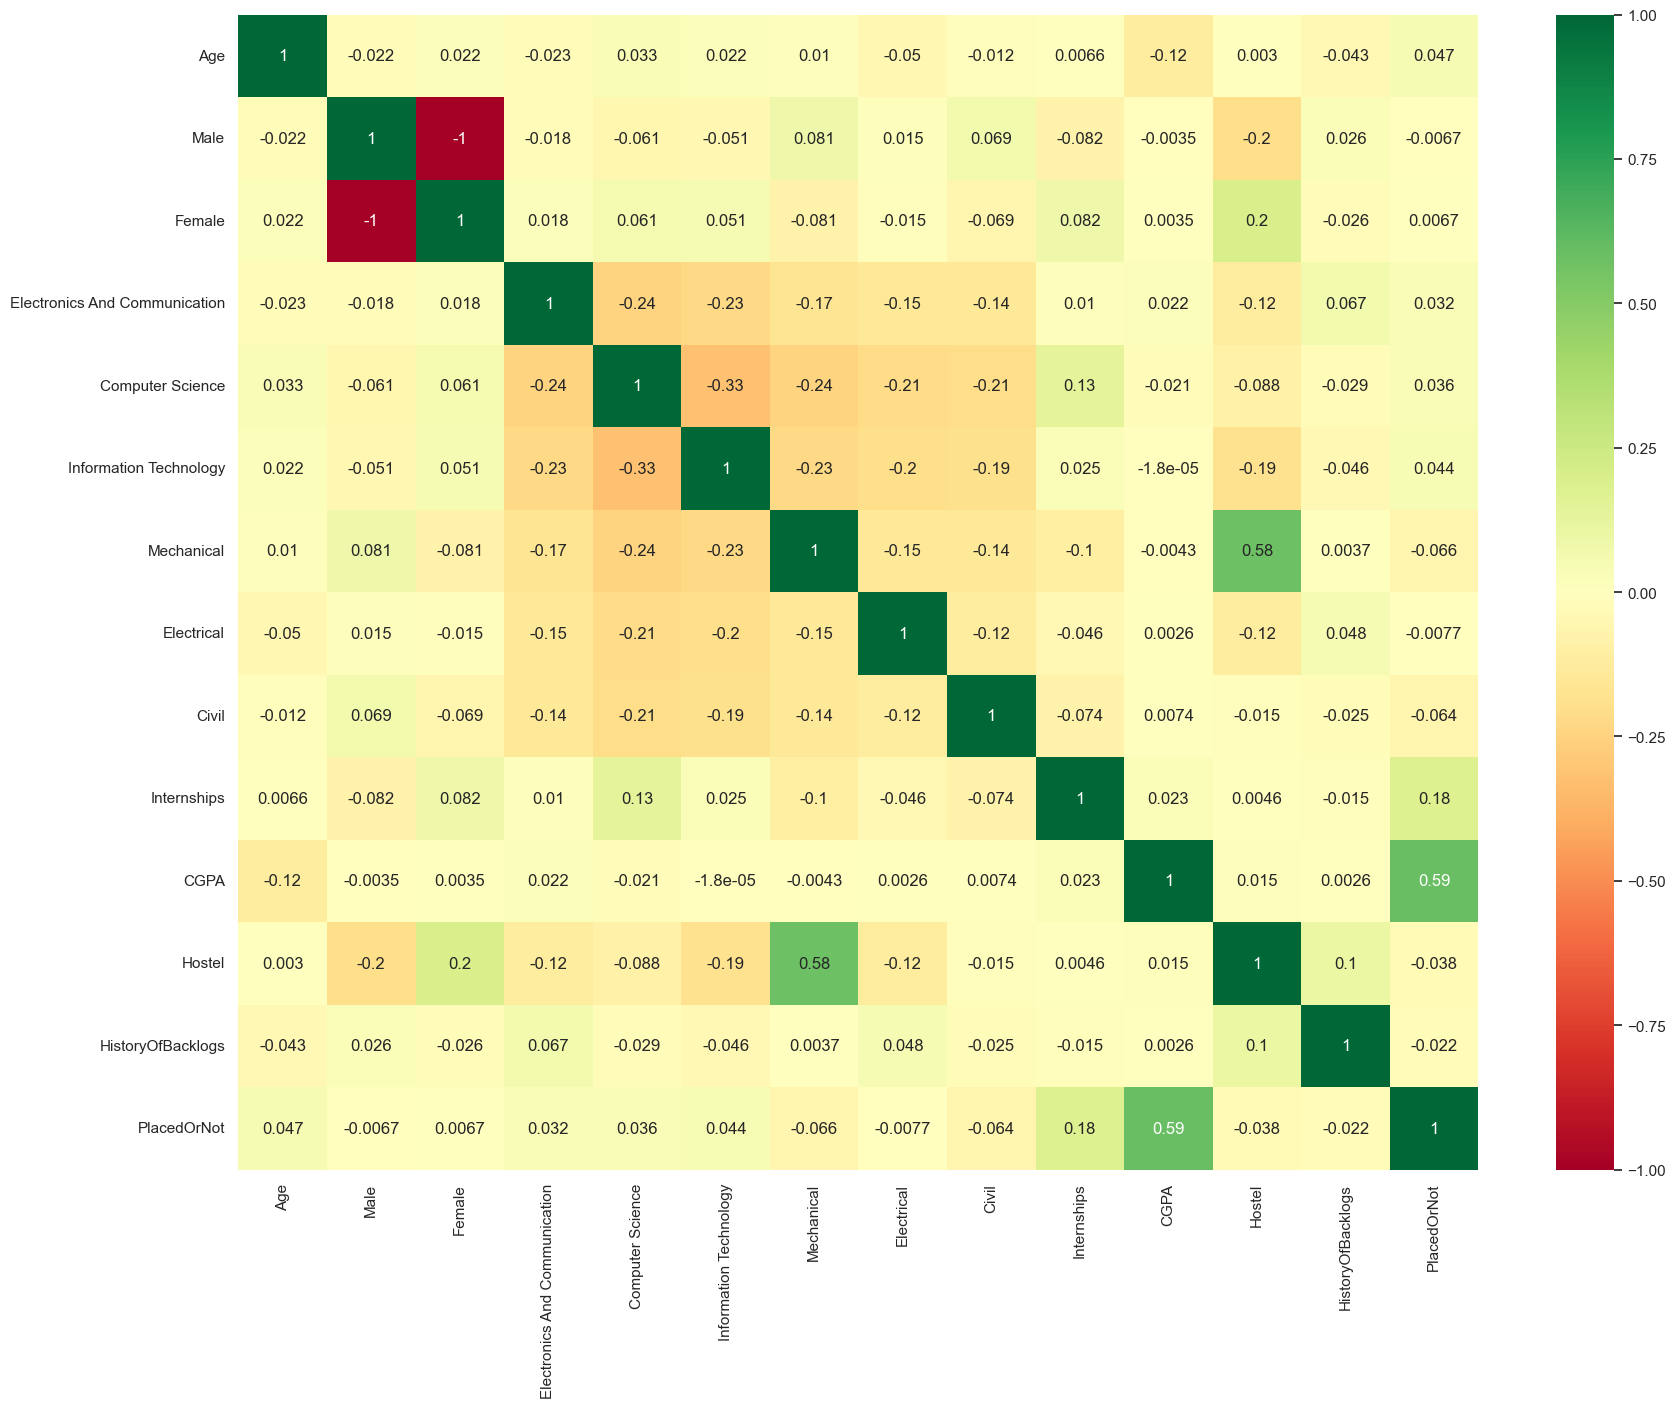

In [52]:
corrmat = data.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(20,15))

#plot heat map
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Internship and CGPA is highly coorelated with dependent feature i.e PlacedOrNot

In [ ]:
# Train test split

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features,
                                                    data['PlacedOrNot'],
                                                    test_size = 0.25,
                                                    random_state = 0)

In [54]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of X_test is: {X_test.shape}\n")

print(f"Shape of y_train is: {y_train.shape}")
print(f"Shape of y_test is: {y_test.shape}")

Shape of X_train is: (2224, 13)
Shape of X_test is: (742, 13)

Shape of y_train is: (2224,)
Shape of y_test is: (742,)


In [ ]:
# Create & Train Model

In [55]:
models = {"DecisionTree":DecisionTreeClassifier(),
         "RandomForest":RandomForestClassifier(),
         "XgBoost": XGBClassifier(),
         "KNeighborsClassifier":KNeighborsClassifier()}

In [57]:
def models_score(models, X_train, X_test, y_train, y_test):    

    scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')

    return model_scores

In [58]:
model_scores = models_score(models, X_train, X_test, y_train, y_test)